In [1]:
# importing the libraries
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from PIL import Image
import seaborn as sns

In [2]:
# loading the data of images and setting their labels
data = []
labels = []

Parasitized = os.listdir("../input/cell-images-for-detecting-malaria/cell_images/Parasitized/")

for a in Parasitized:
    
    try:
        image = cv2.imread("../input/cell-images-for-detecting-malaria/cell_images/Parasitized/" + a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(0)
    
    except AttributeError:
        print("")

Uninfected = os.listdir("../input/cell-images-for-detecting-malaria/cell_images/Uninfected/")

for b in Uninfected:

    try:
        image = cv2.imread("../input/cell-images-for-detecting-malaria/cell_images/Uninfected/" + b)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(1)
    
    except AttributeError:
        print("")

# Creating single numpy array of all the images and labels
data = np.array(data)
labels = np.array(labels)

print('Cells : {} and labels : {}'.format(data.shape , labels.shape))

# lets shuffle the data and labels before splitting them into training and testing sets
n = np.arange(data.shape[0])
np.random.shuffle(n)
data = data[n]
labels = labels[n]



Cells : (27558, 50, 50, 3) and labels : (27558,)


In [3]:
### Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 0)

print('Train data shape {} ,Test data shape {} '.format(X_train.shape, X_test.shape))

Train data shape (22046, 50, 50, 3) ,Test data shape (5512, 50, 50, 3) 


In [4]:
X_train = X_train.astype('float32')  # converting the type
X_test = X_test.astype('float32')

In [5]:
# One Hot Encoding 
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#### Model

In [6]:
# importing libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization

In [7]:
# Defining Model
classifier = Sequential()

# CNN layers
classifier.add(Conv2D(32, kernel_size=(3, 3), input_shape = (50, 50, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.5))   # Dropout prevents overfitting

classifier.add(Conv2D(32, kernel_size=(3, 3), input_shape = (50, 50, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.5))

classifier.add(Flatten())

classifier.add(Dense(units=128, activation='relu'))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.5))

classifier.add(Dense(units=2, activation='sigmoid'))  # sigmoid for binary

In [8]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [9]:
history = classifier.fit(X_train, y_train, batch_size=120, epochs=25, verbose=1, validation_data=(X_test, y_test))

Epoch 1/25
184/184 [==============================] - 31s 170ms/step - loss: 0.5797 - accuracy: 0.7103 - val_loss: 1.7261 - val_accuracy: 0.5833
Epoch 2/25
184/184 [==============================] - 32s 172ms/step - loss: 0.3082 - accuracy: 0.8795 - val_loss: 0.9393 - val_accuracy: 0.7749
Epoch 3/25
184/184 [==============================] - 31s 168ms/step - loss: 0.2486 - accuracy: 0.9057 - val_loss: 0.4564 - val_accuracy: 0.8120
Epoch 4/25
184/184 [==============================] - 32s 172ms/step - loss: 0.2213 - accuracy: 0.9171 - val_loss: 0.3311 - val_accuracy: 0.8859
Epoch 5/25
184/184 [==============================] - 31s 167ms/step - loss: 0.2118 - accuracy: 0.9234 - val_loss: 0.2611 - val_accuracy: 0.9102
Epoch 6/25
184/184 [==============================] - 32s 174ms/step - loss: 0.2010 - accuracy: 0.9266 - val_loss: 0.2529 - val_accuracy: 0.9051
Epoch 7/25
184/184 [==============================] - 31s 167ms/step - loss: 0.1861 - accuracy: 0.9319 - val_loss: 0.3173 - val_ac

In [10]:
print("Test_Accuracy: {:.2f}%".format(classifier.evaluate(X_test, y_test)[1]*100))

173/173 [==============================] - 2s 11ms/step - loss: 0.1408 - accuracy: 0.9499
Test_Accuracy: 94.99%


In [11]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 32)        1

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
# Convert back to categorical values 
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

print('Accuracy Score: ', accuracy_score(y_test, y_pred))

Accuracy Score:  0.9499274310595065


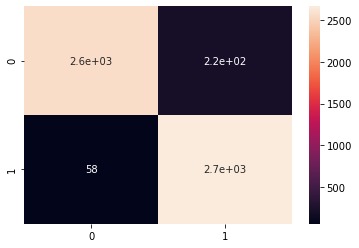

In [15]:
# Plotting the Confusion Matrix
import matplotlib.pyplot as plt
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True)

### Testing model on Holdout Dataset

In [24]:
# loading holdout dataset
data_new = []

holdout_set = os.listdir("../input/holdout-dataset-for-malaria/holdout_dataset")

for i in holdout_set:
    
    try:
        image = cv2.imread("../input/holdout-dataset-for-malaria/holdout_dataset/" + i)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data_new.append(np.array(size_image))
    
    except AttributeError:
        print("")

# Creating numpy array
data_new = np.array(data_new)

print(data_new.shape)

(200, 50, 50, 3)


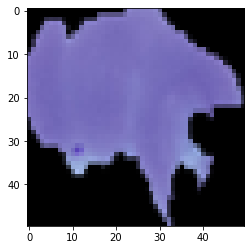

In [25]:
plt.imshow(data_new[10])

This is Uninfected

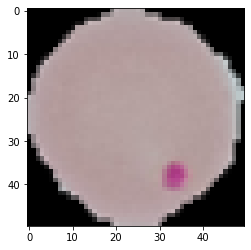

In [28]:
plt.imshow(data_new[199])

This is Parasitized

### Lets see what our model predicts now

In [29]:
data_new = data_new.astype('float32')

# prediction
pred = classifier.predict(data_new)

In [30]:
pred = np.argmax(pred, axis=1)

In [31]:
pred[10]

1

1 is Uninfected

In [32]:
pred[199]

0

0 is Parasitized